# Shotglass: Coreutils code information

## releases over time



In [16]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import shotlib
from shotlib import select1, selectall

db,_curs = shotlib.get_db()
print(select1(_curs, 'select sqlite_version()'))

3.36.0


In [21]:
releases_df = pd.read_sql_query('select tag, creator_dt from releases limit 3', db)

# convert raw list of tuples to DataFrame
# > releases_df = selectall(db, 'select tag, creator_dt from releases limit 3')
# > df = pandas.DataFrame(releases, columns=['tag', 'creator_dt'])


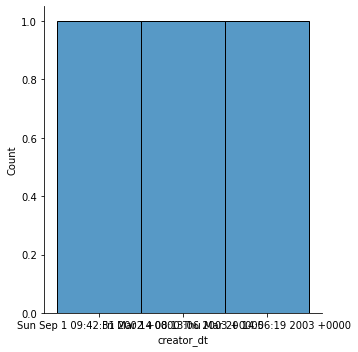

In [22]:
sns.displot(data=releases_df['creator_dt'])
